In [1]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import time

# select the processor device

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [3]:
# Model

net = nn.Sequential(
    nn.Linear(20,100),
    nn.ReLU(),
    nn.Linear(100,500),
    nn.ReLU(),
    nn.Linear(500,30),
    nn.ReLU(),
    nn.Linear(30,2)
    )

# Make same data

In [4]:
# just some random fluff
data = torch.randn((1000,20)) # sampel X features
labels = torch.randint(low=0,high=2,size=(1,1000))

# send the model and the data to the GPU

In [5]:
# model
net.to(device)

#data
data = data.to(device)
labels = labels.to(device)


In [6]:
data

tensor([[-0.9326,  0.2134, -0.6549,  ...,  0.1322,  1.1318,  0.9635],
        [-0.4350,  0.3593, -0.8528,  ..., -0.9125,  1.2885, -0.4338],
        [ 0.6309, -0.8994,  1.3312,  ..., -0.0678, -1.2436, -0.0202],
        ...,
        [ 0.6442, -0.2624, -0.5031,  ...,  0.1655, -1.7681,  0.5094],
        [ 0.0829,  0.1809,  2.2613,  ..., -0.0764, -0.8706, -0.4846],
        [-0.0631,  0.0854, -1.4256,  ..., -0.7611,  0.5727,  0.1048]],
       device='cuda:0')

In [7]:
# you can also create data directly on the GPU
dataG = torch.randn((1000,20),device=device)
dataC = torch.randn((1000,20),device='cpu')

print(data.device)
print(dataG.device)
print(dataC.device)

cuda:0
cuda:0
cpu


In [8]:
# getting results from the model
output = net(data)

In [9]:
output.device

device(type='cuda', index=0)

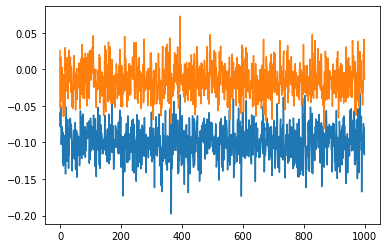

In [11]:
# try to plot the data
plt.plot(output.detach().cpu());

# Experiment computation time

In [12]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cuda:0'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
GPUtime = 1000*(time.process_time() - starttime)




In [13]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cpu'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
CPUtime = 1000*(time.process_time() - starttime)

In [14]:
# time in ms
[CPUtime,GPUtime]

[12.410849000000113, 2.5323620000001767]

In [15]:
# recreate network and data
net  = nn.Sequential(nn.Linear(20,100),nn.ReLU(),nn.Linear(100,500),nn.ReLU(),nn.Linear(500,30),nn.ReLU(),nn.Linear(30,2))
data = torch.randn((1000,20))

# rerun the experiment
starttime = time.process_time()
output    = net(data).detach()
CPUtime2  = 1000*(time.process_time() - starttime)

# report the results
[CPUtime2,CPUtime,GPUtime]

[7.285695000000203, 12.410849000000113, 2.5323620000001767]